# Association Rule for Store Dataset

## Load Data

In [257]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

! pip install mlxtend

In [258]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats

Load data dan tunjukan 5 row pertamanya

Dataset :
https://raw.githubusercontent.com/GTerrence/dataset/main/Groceries%20data.csv

In [259]:
df = pd.read_csv('https://raw.githubusercontent.com/GTerrence/dataset/main/Groceries%20data.csv')
df.head(5)

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


<h2> EDA

In [260]:
df.shape

(38765, 7)

In [261]:
df.describe()

,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [263]:
df.duplicated().sum()

759

In [264]:
df.drop_duplicates()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


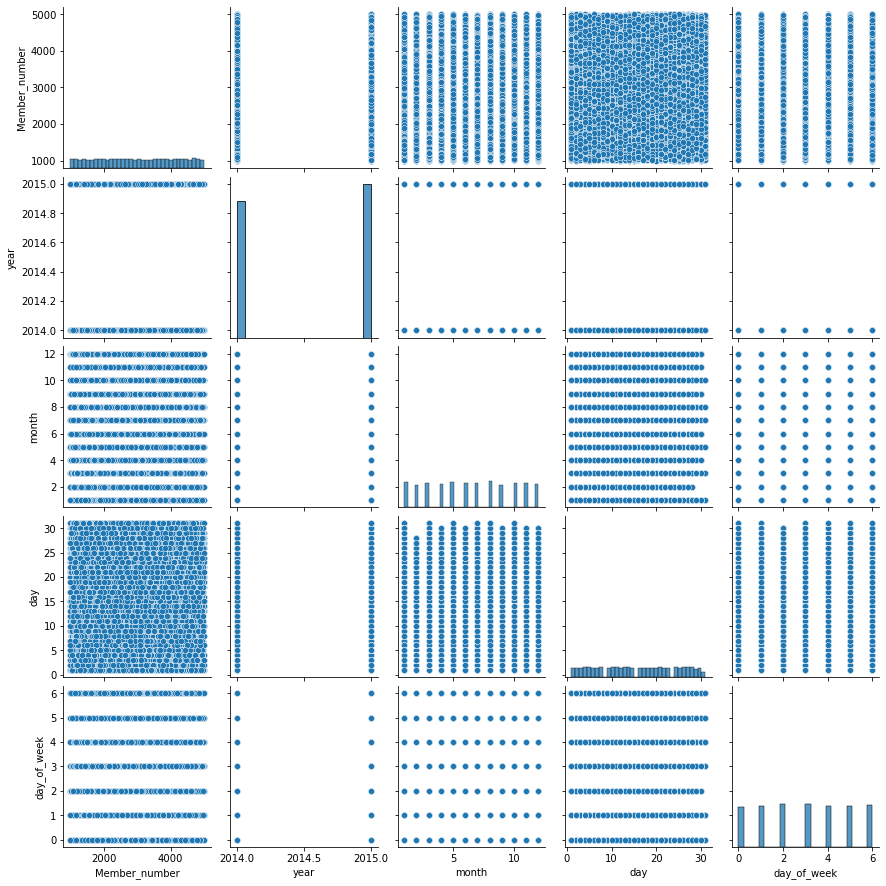

In [265]:
sns.pairplot(df)

In [266]:
sns.catplot(x="Member_number", y="year", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs proline")
plt.show()

<h2> Data Preprocessing

Ubahlah dataset di atas menjadi bentuk one hot encoding. Asumsikanlah bahwa pembelian barang yang dilakukan oleh Customer ID yang sama dalam hari yang sama terjadi dalam 1 transaksi yang sama (satu Order ID)

contoh :
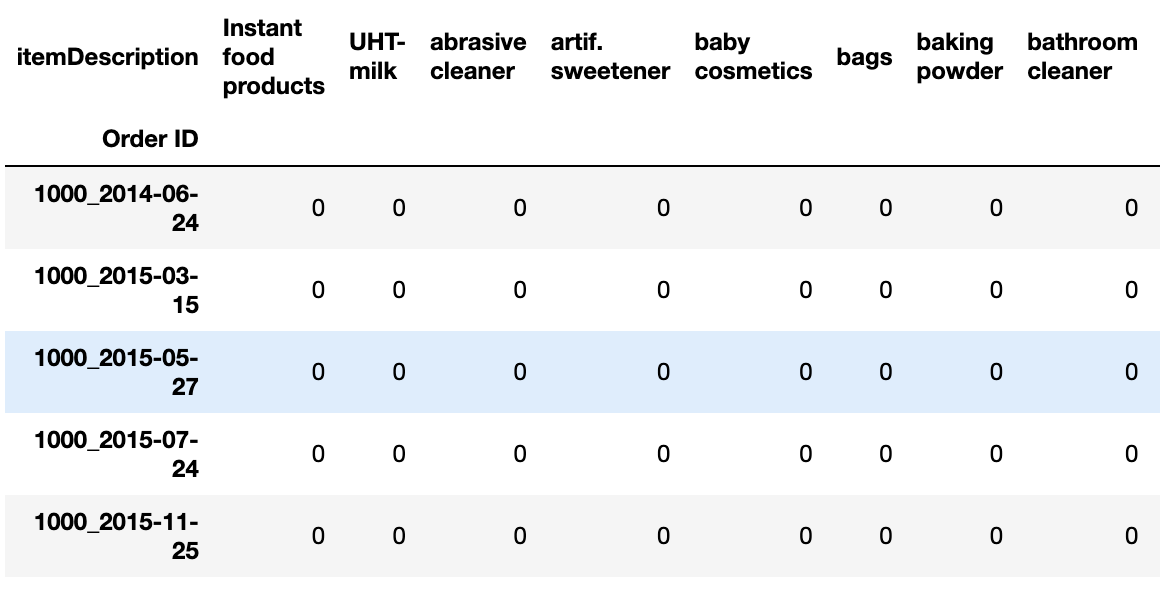

In [267]:
df['Order_ID'] = df['Member_number'].astype(str) + '_' + df['Date'].astype(str)

In [268]:
data = df.pivot_table(index='Order_ID',columns='itemDescription', aggfunc={'itemDescription':'count'}).fillna(0)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

ohe = data.applymap(encode_units)
ohe

itemDescription                            \
itemDescription Instant food products UHT-milk abrasive cleaner   
Order_ID                                                          
1000_2014-06-24                     0        0                0   
1000_2015-03-15                     0        0                0   
1000_2015-05-27                     0        0                0   
1000_2015-07-24                     0        0                0   
1000_2015-11-25                     0        0                0   
...                               ...      ...              ...   
4999_2015-05-16                     0        0                0   
4999_2015-12-26                     0        0                0   
5000_2014-09-03                     0        0                0   
5000_2014-11-16                     0        0                0   
5000_2015-10-02                     0        0                0   

                                                                    \
itemDescription artif. sweetener baby cosmetics bags baking powder   
Order_ID                                                             
1000_2014-06-24                0              0    0             0   
1000_2015-03-15                0              0    0             0   
1000_2015-05-27                0              0    0             0   
1000_2015-07-24                0              0    0             0   
1000_2015-11-25                0              0    0             0   
...                          ...            ...  ...           ...   
4999_2015-05-16                0              0    0             0   
4999_2015-12-26                0              0    0             0   
5000_2014-09-03                0              0    0             0   
5000_2014-11-16                0              0    0             0   
5000_2015-10-02                0              0    0             0   

                                               ...                         \
itemDescription bathroom cleaner beef berries  ... turkey vinegar waffles   
Order_ID                                       ...                          
1000_2014-06-24                0    0       0  ...      0       0       0   
1000_2015-03-15                0    0       0  ...      0       0       0   
1000_2015-05-27                0    0       0  ...      0       0       0   
1000_2015-07-24                0    0       0  ...      0       0       0   
1000_2015-11-25                0    0       0  ...      0       0       0   
...                          ...  ...     ...  ...    ...     ...     ...   
4999_2015-05-16                0    0       0  ...      0       0       0   
4999_2015-12-26                0    0       0  ...      0       0       0   
5000_2014-09-03                0    0       0  ...      0       0       0   
5000_2014-11-16                0    0       0  ...      0       0       0   
5000_2015-10-02                0    0       0  ...      0       0       0   

                                                                             \
itemDescription whipped/sour cream whisky white bread white wine whole milk   
Order_ID                                                                      
1000_2014-06-24                  0      0           0          0          1   
1000_2015-03-15                  0      0           0          0          1   
1000_2015-05-27                  0      0           0          0          0   
1000_2015-07-24                  0      0           0          0          0   
1000_2015-11-25                  0      0           0          0          0   
...                            ...    ...         ...        ...        ...   
4999_2015-05-16                  1      0           0          0          0   
4999_2015-12-26                  0      0           0          0          0   
5000_2014-09-03                  0      0           0          0          0   
5000_2014-11-16                  0      0           0          0          0

In [269]:
ohe.columns = ohe.columns.droplevel()

In [270]:
ohe

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Order_ID,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_2015-05-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4999_2015-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_2014-09-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apriori Algorithm

Gunakanlah algroitma apriori untuk mencari tahu produk mana yang sering dibeli secara bersama-sama (min support = 0.01)

In [271]:
freq_items = apriori(ohe, min_support=0.01, use_colnames=True, verbose=1)
freq_items

C:\Users\ASUS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 18 combinations | Sampling itemset size 3 2


,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)
...,...,...
64,0.010559,"(rolls/buns, other vegetables)"
65,0.014837,"(whole milk, other vegetables)"
66,0.013968,"(rolls/buns, whole milk)"
67,0.011629,"(whole milk, soda)"


Berdasarkan hasil di atas, buatlah association rules nya dengan syarat min confidence = 0.1 

In [272]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
1,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
3,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
